# Import Packages

In [1]:
import os
os.environ['XDG_CACHE_HOME'] = 'home/msds2022/mpingol/ .cache'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import re
from itertools import chain

# Load Data

In [3]:
df = pd.ExcelFile('research_profile_v4.xlsx').parse('research_profile')

In [4]:
kp_df = df[['Research Title', 'Abstract', 'Keywords']].copy()
kp_df.columns = ['title', 'abstract', 'keywords']

# EDA

Number of abstracts with keywords

In [5]:
kp_df['keywords'].notnull().sum()

814

Number of abstracts without keywords

In [6]:
kp_df['keywords'].isnull().sum()

465

Proportion of abstracts without keywords

In [7]:
kp_df['keywords'].isnull().sum()/len(kp_df['keywords'])

0.3635652853792025

Average keyword count per abstract

In [8]:
origkw_count = []
kw_idx = kp_df['keywords'][kp_df['keywords'].notnull()].index
for kw in kp_df['keywords'].loc[kw_idx]:
    try:
        kw = re.sub(r", ", "; ", kw)
        kw = kw.split(";")
        origkw_count.append(len(kw))
    except:
        print(kw)
        
np.mean(origkw_count)

4.12039312039312

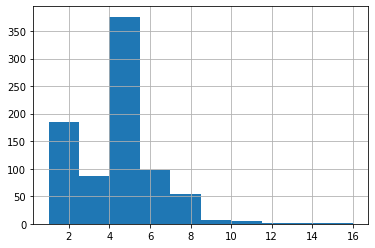

In [9]:
pd.Series(origkw_count).hist();

Average word count per keyphrase

In [10]:
origkw_wordcount = []
kw_idx = kp_df['keywords'][kp_df['keywords'].notnull()].index
for kw in kp_df['keywords'].loc[kw_idx]:
    try:
        kw = re.sub(r", ", "; ", kw)
        kw = kw.split(";")
        origkw_wordcount.append([len(p.split(" ")) for p in kw])
    except:
        print(kw)
        
origkw_wordcount = list(itertools.chain.from_iterable(origkw_wordcount))

np.mean(origkw_wordcount)

2.133571854502087

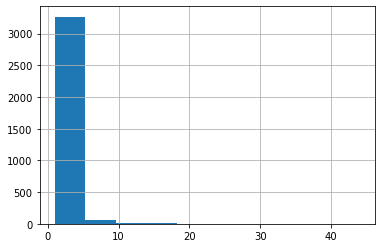

In [11]:
pd.Series(origkw_wordcount).hist();